In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline


In [212]:
data = pd.read_csv('data/Cleaned/Cleaned_channelData.csv')

In [213]:
data.head()

,Unnamed: 0,channel_name,Subscribers,Viewers,Videos_made,channel_description,start_year,start_month,start_day,start_time,start_hour,start_minute,start_second
0,0,Zee TV,72500000,7.649366e+10,134822,"Launched in 1992, ZEE TV is the pioneer of tel...",2005,12,11,06:23:26,6,23,26
1,1,T-Series,249000000,2.328870e+11,19492,"""Music can change the world"". T-Series is Indi...",2006,3,13,14:27:05,14,27,5
2,2,Cocomelon - Nursery Rhymes,165000000,1.682480e+11,1005,"At CoComelon, our primary goal has always been...",2006,9,1,22:18:49,22,18,49
3,3,SET India,162000000,1.517180e+11,118804,Sony Entertainment Television is one of the le...,2006,9,20,22:24:59,22,24,59
4,4,WWE,97100000,7.877977e+10,71268,WWE on YouTube is your number one spot to catc...,2007,5,11,01:20:02,1,20,2


In [214]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [215]:
data.head(1)

,channel_name,Subscribers,Viewers,Videos_made,channel_description,start_year,start_month,start_day,start_time,start_hour,start_minute,start_second
0,Zee TV,72500000,7.649366e+10,134822,"Launched in 1992, ZEE TV is the pioneer of tel...",2005,12,11,06:23:26,6,23,26


In [216]:
data.isna().sum()

channel_name             0
Subscribers              0
Viewers                  0
Videos_made              0
channel_description    372
start_year               0
start_month              0
start_day                0
start_time               0
start_hour               0
start_minute             0
start_second             0
dtype: int64

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channel_name         4334 non-null   object 
 1   Subscribers          4334 non-null   int64  
 2   Viewers              4334 non-null   float64
 3   Videos_made          4334 non-null   int64  
 4   channel_description  3962 non-null   object 
 5   start_year           4334 non-null   int64  
 6   start_month          4334 non-null   int64  
 7   start_day            4334 non-null   int64  
 8   start_time           4334 non-null   object 
 9   start_hour           4334 non-null   int64  
 10  start_minute         4334 non-null   int64  
 11  start_second         4334 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 406.4+ KB


In [218]:
popularity_threshold = 5000000

# Create the target variable based on the threshold
data['popularity'] = (data['Subscribers'] > popularity_threshold).astype(int)

In [219]:
data.head(3)

,channel_name,Subscribers,Viewers,Videos_made,channel_description,start_year,start_month,start_day,start_time,start_hour,start_minute,start_second,popularity
0,Zee TV,72500000,7.649366e+10,134822,"Launched in 1992, ZEE TV is the pioneer of tel...",2005,12,11,06:23:26,6,23,26,1
1,T-Series,249000000,2.328870e+11,19492,"""Music can change the world"". T-Series is Indi...",2006,3,13,14:27:05,14,27,5,1
2,Cocomelon - Nursery Rhymes,165000000,1.682480e+11,1005,"At CoComelon, our primary goal has always been...",2006,9,1,22:18:49,22,18,49,1


In [220]:
X = data[['Viewers', 'Videos_made', 'start_day', 'start_hour']]
# Define the target variable
y = data[['popularity']]

In [221]:
X.head()

,Viewers,Videos_made,start_day,start_hour
0,7.649366e+10,134822,11,6
1,2.328870e+11,19492,13,14
2,1.682480e+11,1005,1,22
3,1.517180e+11,118804,20,22
4,7.877977e+10,71268,11,1


D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

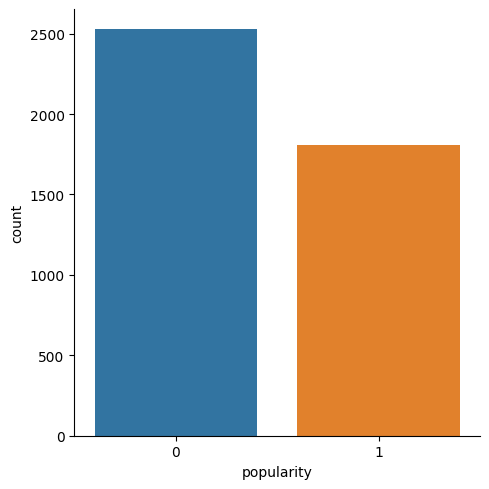

In [222]:
sns.catplot(x = 'popularity', data = y, kind = 'count')

## Training and Testing sets

In [223]:
# Split the data into training and testing sets (80% training, 20% testing)
y = data['popularity'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [224]:
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [225]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



In [226]:
# Function to evaluate and plot results
# def evaluate_and_plot(model, X_test, y_test, kernel_name, cost):
#     # Predictions
#     y_pred = model.predict(X_test)

#     # Calculate confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     plot_confusion_matrix(cm, classes=['Not Popular', 'Popular'], title=f'Confusion Matrix ({kernel_name} Kernel, Cost={cost})')

#     # Calculate accuracy
#     acc = accuracy_score(y_test, y_pred)
#     print(f'Accuracy ({kernel_name} Kernel): {acc:.2f}')
#     print(f'CM: {kernel_name} - {cm}')

#     # Save the confusion matrix plot as a jpg file in a separate directory
#     save_dir = 'confusion_matrix_plots'
#     os.makedirs(save_dir, exist_ok=True)
#     save_path = os.path.join(save_dir, f'{kernel_name}_{cost}.jpg')

#     # Clear the current figure to start with a fresh one
#     plt.clf()

#     # Save the figure directly without closing it
#     plt.savefig(save_path)


def evaluate_and_plot(model, X_test, y_test, kernel_name, cost):
    # Predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['Not Popular', 'Popular'], title=f'Confusion Matrix ({kernel_name} Kernel, Cost={cost})')

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy ({kernel_name} Kernel): {acc:.2f}')
    print(f'CM: {kernel_name} - {cm}')

    # Save the confusion matrix plot as a jpg file in a separate directory
    save_dir = 'confusion_matrix_plots'
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f'{kernel_name}_{cost}.jpg')

    # Clear the current figure to start with a fresh one
    plt.clf()

    # Save the figure directly without closing it
    plt.savefig(save_path)

    # Calculate and print classification report
    class_report = classification_report(y_test, y_pred, target_names=['Not Popular', 'Popular'])
    print(f'Classification Report ({kernel_name} Kernel, Cost={cost}):')
    print(class_report)


# Try different kernels and costs
kernels = ['linear', 'rbf', 'poly']
costs = [1, 10, 100]


In [227]:
# Specify the directory to save the files
save_dir = 'confusion_matrix_plots'
os.makedirs(save_dir, exist_ok=True)

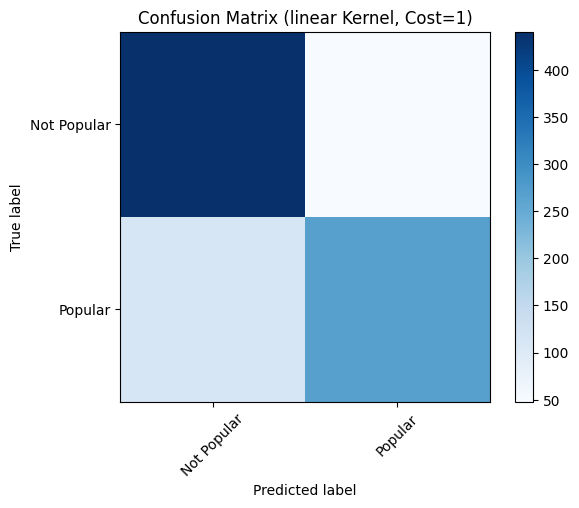

Accuracy (linear Kernel): 0.82
CM: linear - [[440  48]
 [112 267]]
Classification Report (linear Kernel, Cost=1):
              precision    recall  f1-score   support

 Not Popular       0.80      0.90      0.85       488
     Popular       0.85      0.70      0.77       379

    accuracy                           0.82       867
   macro avg       0.82      0.80      0.81       867
weighted avg       0.82      0.82      0.81       867



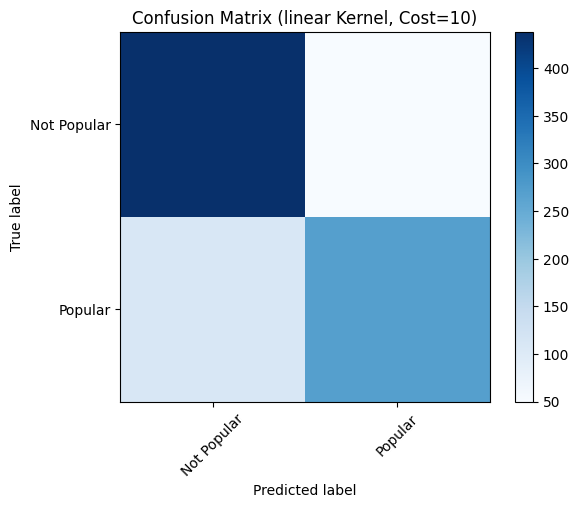

Accuracy (linear Kernel): 0.82
CM: linear - [[438  50]
 [110 269]]
Classification Report (linear Kernel, Cost=10):
              precision    recall  f1-score   support

 Not Popular       0.80      0.90      0.85       488
     Popular       0.84      0.71      0.77       379

    accuracy                           0.82       867
   macro avg       0.82      0.80      0.81       867
weighted avg       0.82      0.82      0.81       867



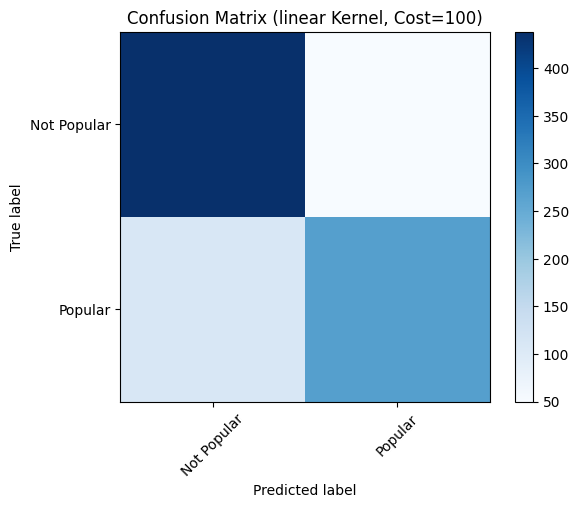

Accuracy (linear Kernel): 0.82
CM: linear - [[438  50]
 [110 269]]
Classification Report (linear Kernel, Cost=100):
              precision    recall  f1-score   support

 Not Popular       0.80      0.90      0.85       488
     Popular       0.84      0.71      0.77       379

    accuracy                           0.82       867
   macro avg       0.82      0.80      0.81       867
weighted avg       0.82      0.82      0.81       867



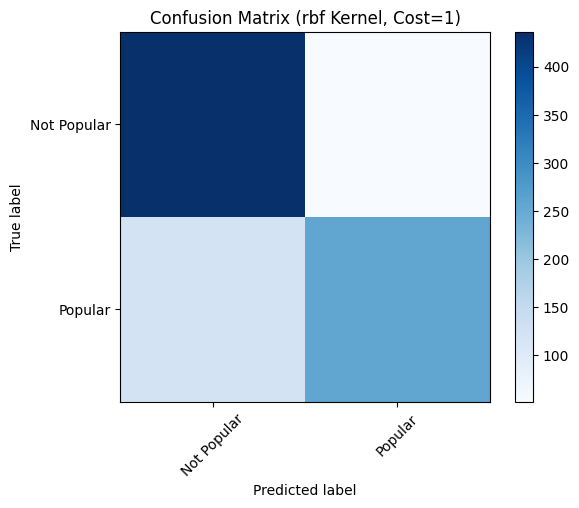

Accuracy (rbf Kernel): 0.80
CM: rbf - [[436  52]
 [122 257]]
Classification Report (rbf Kernel, Cost=1):
              precision    recall  f1-score   support

 Not Popular       0.78      0.89      0.83       488
     Popular       0.83      0.68      0.75       379

    accuracy                           0.80       867
   macro avg       0.81      0.79      0.79       867
weighted avg       0.80      0.80      0.80       867



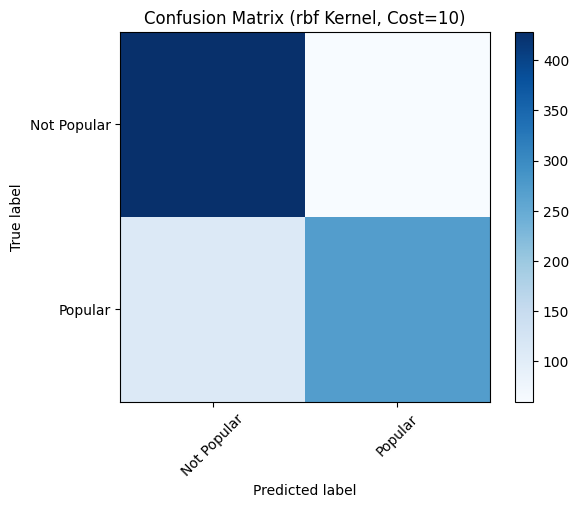

Accuracy (rbf Kernel): 0.81
CM: rbf - [[428  60]
 [109 270]]
Classification Report (rbf Kernel, Cost=10):
              precision    recall  f1-score   support

 Not Popular       0.80      0.88      0.84       488
     Popular       0.82      0.71      0.76       379

    accuracy                           0.81       867
   macro avg       0.81      0.79      0.80       867
weighted avg       0.81      0.81      0.80       867



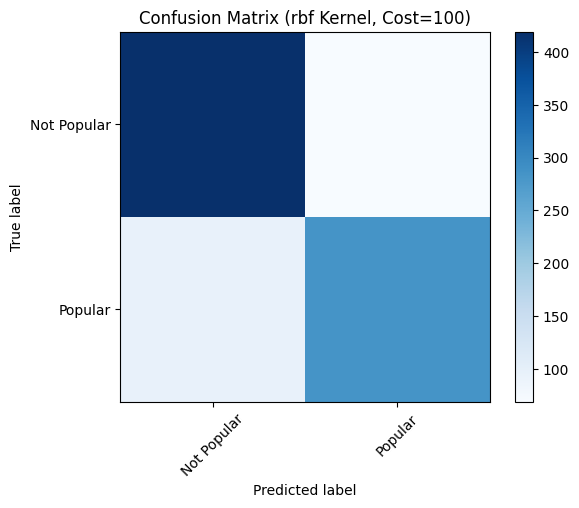

Accuracy (rbf Kernel): 0.81
CM: rbf - [[419  69]
 [ 95 284]]
Classification Report (rbf Kernel, Cost=100):
              precision    recall  f1-score   support

 Not Popular       0.82      0.86      0.84       488
     Popular       0.80      0.75      0.78       379

    accuracy                           0.81       867
   macro avg       0.81      0.80      0.81       867
weighted avg       0.81      0.81      0.81       867



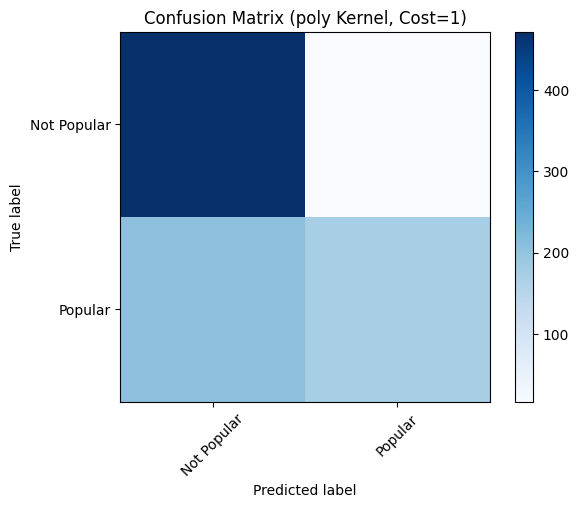

Accuracy (poly Kernel): 0.74
CM: poly - [[471  17]
 [205 174]]
Classification Report (poly Kernel, Cost=1):
              precision    recall  f1-score   support

 Not Popular       0.70      0.97      0.81       488
     Popular       0.91      0.46      0.61       379

    accuracy                           0.74       867
   macro avg       0.80      0.71      0.71       867
weighted avg       0.79      0.74      0.72       867



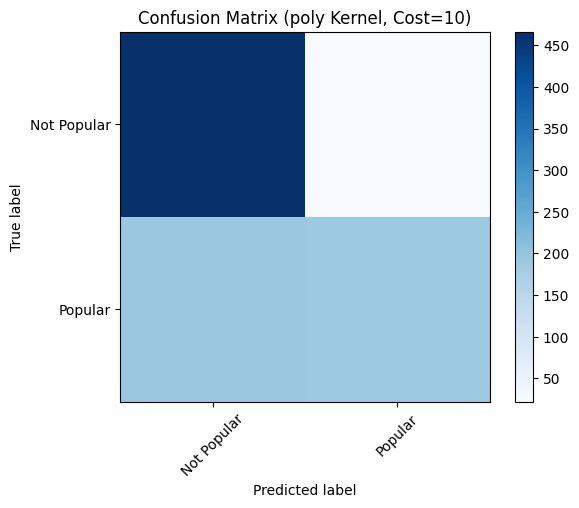

Accuracy (poly Kernel): 0.75
CM: poly - [[466  22]
 [191 188]]
Classification Report (poly Kernel, Cost=10):
              precision    recall  f1-score   support

 Not Popular       0.71      0.95      0.81       488
     Popular       0.90      0.50      0.64       379

    accuracy                           0.75       867
   macro avg       0.80      0.73      0.73       867
weighted avg       0.79      0.75      0.74       867



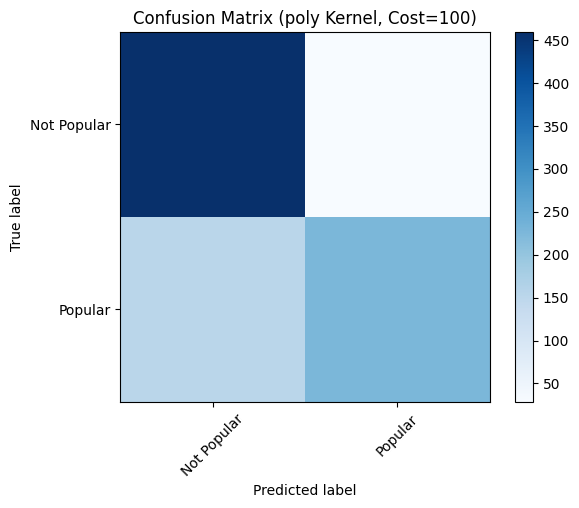

Accuracy (poly Kernel): 0.79
CM: poly - [[459  29]
 [153 226]]
Classification Report (poly Kernel, Cost=100):
              precision    recall  f1-score   support

 Not Popular       0.75      0.94      0.83       488
     Popular       0.89      0.60      0.71       379

    accuracy                           0.79       867
   macro avg       0.82      0.77      0.77       867
weighted avg       0.81      0.79      0.78       867



<Figure size 640x480 with 0 Axes>

In [228]:
for kernel in kernels:
    for cost in costs:
        # Create SVM model with specified kernel and cost
        clf = svm.SVC(kernel=kernel, C=cost)

        # Create a pipeline with standardization
        model = make_pipeline(StandardScaler(), clf)

        # Fit the model
        model.fit(X_train, y_train)

        # Evaluate and plot results
        evaluate_and_plot(model, X_test, y_test, kernel, cost)

## Hyperparameter Tuning

In [229]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Poly kernel
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0.1, 1, 10]
}
y = data['popularity'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
# Create a Poly kernel SVM model
poly_svm = svm.SVC(kernel='poly')

# Initialize GridSearchCV for Poly kernel
grid_search_poly = GridSearchCV(poly_svm, param_grid_poly, cv=5, scoring='accuracy')

# Fit the Poly kernel model with the training data
grid_search_poly.fit(X_train, y_train)

# Get the best parameters for Poly kernel
best_params_poly = grid_search_poly.best_params_

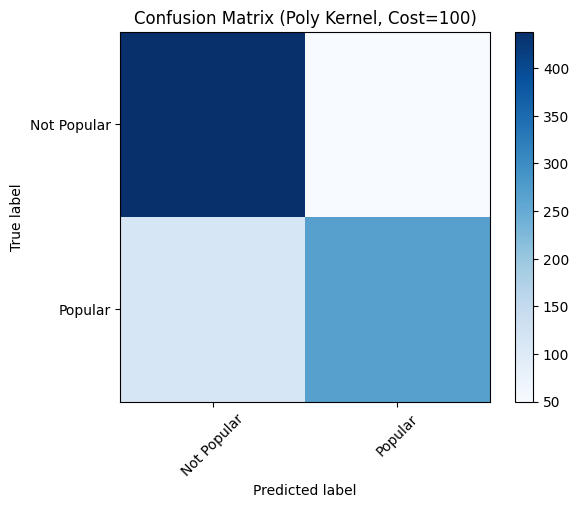

Accuracy (Poly Kernel): 0.81
CM: Poly - [[438  50]
 [111 268]]
Classification Report (Poly Kernel, Cost=100):
              precision    recall  f1-score   support

 Not Popular       0.80      0.90      0.84       488
     Popular       0.84      0.71      0.77       379

    accuracy                           0.81       867
   macro avg       0.82      0.80      0.81       867
weighted avg       0.82      0.81      0.81       867

Best Parameters for Poly Kernel: {'C': 0.1, 'coef0': 1, 'degree': 4}


<Figure size 640x480 with 0 Axes>

In [231]:
# Train a Poly kernel SVM model with the best parameters
best_poly_model = svm.SVC(kernel='poly', C=best_params_poly['C'], degree=best_params_poly['degree'], coef0=best_params_poly['coef0'])
best_poly_model.fit(X_train, y_train)

# Evaluate and plot the results for Poly kernel
evaluate_and_plot(best_poly_model, X_test, y_test, 'Poly', cost)

# Print the best parameters for Poly kernel
print("Best Parameters for Poly Kernel:", best_params_poly)

In [232]:
# Define the parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Create an RBF kernel SVM model
rbf_svm = svm.SVC(kernel='rbf')

In [233]:
# Initialize GridSearchCV for RBF kernel
grid_search_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=5, scoring='accuracy')

# Fit the RBF kernel model with the training data
grid_search_rbf.fit(X_train, y_train)

# Get the best parameters for RBF kernel
best_params_rbf = grid_search_rbf.best_params_

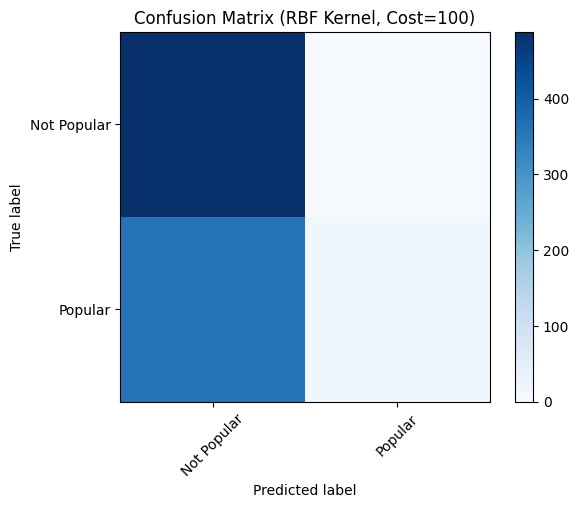

Accuracy (RBF Kernel): 0.58
CM: RBF - [[488   0]
 [360  19]]
Classification Report (RBF Kernel, Cost=100):
              precision    recall  f1-score   support

 Not Popular       0.58      1.00      0.73       488
     Popular       1.00      0.05      0.10       379

    accuracy                           0.58       867
   macro avg       0.79      0.53      0.41       867
weighted avg       0.76      0.58      0.45       867

Best Parameters for RBF Kernel: {'C': 1, 'gamma': 1}


<Figure size 640x480 with 0 Axes>

In [234]:
# Train an RBF kernel SVM model with the best parameters
best_rbf_model = svm.SVC(kernel='rbf', C=best_params_rbf['C'], gamma=best_params_rbf['gamma'])
best_rbf_model.fit(X_train, y_train)

# Evaluate and plot the results for RBF kernel
evaluate_and_plot(best_rbf_model, X_test, y_test, 'RBF', cost)

# Print the best parameters for RBF kernel
print("Best Parameters for RBF Kernel:", best_params_rbf)